# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [51]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_cities = "output_cities.csv"


#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
i=0
wind = []
clouds = []
humidity = []
country = []
date = []
temperture = []
city_found = []
latitude = []
longitude = []

for city in cities:
    i+=1
    print("Record "+str(i))
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    print(url)
    try:
        weather = requests.get(url).json()
        print("Found "+city)
        wind.append(weather["wind"]["speed"])
        clouds.append(weather["clouds"]["all"])
        humidity.append(weather["main"]["humidity"])
        country.append(weather["sys"]["country"])
        date.append(weather["dt"])
        temperture.append(weather["main"]["temp_max"])
        latitude.append(weather["coord"]["lat"])
        longitude.append(weather["coord"]["lon"])
        city_found.append(city)
    except:
        print("Not found "+city)

Record 1
http://api.openweathermap.org/data/2.5/weather?q=khasan&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found khasan
Record 2
http://api.openweathermap.org/data/2.5/weather?q=los llanos de aridane&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found los llanos de aridane
Record 3
http://api.openweathermap.org/data/2.5/weather?q=avarua&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found avarua
Record 4
http://api.openweathermap.org/data/2.5/weather?q=ambad&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found ambad
Record 5
http://api.openweathermap.org/data/2.5/weather?q=rikitea&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found rikitea
Record 6
http://api.openweathermap.org/data/2.5/weather?q=rumuruti&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found rumuruti
Record 7
http://api.openweathermap.org/data/2.5/weather?q=vaini&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found vaini
Record 8
http://api.openweathermap.org/data/

Found okandja
Not found okandja
Record 60
http://api.openweathermap.org/data/2.5/weather?q=belushya guba&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found belushya guba
Not found belushya guba
Record 61
http://api.openweathermap.org/data/2.5/weather?q=karamea&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found karamea
Not found karamea
Record 62
http://api.openweathermap.org/data/2.5/weather?q=pevek&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found pevek
Record 63
http://api.openweathermap.org/data/2.5/weather?q=ulladulla&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found ulladulla
Record 64
http://api.openweathermap.org/data/2.5/weather?q=madang&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found madang
Record 65
http://api.openweathermap.org/data/2.5/weather?q=khani&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found khani
Record 66
http://api.openweathermap.org/data/2.5/weather?q=cherskiy&appid=1d9b9d1d9c8ebacd2388b0c158c18014&uni

Found port elizabeth
Record 120
http://api.openweathermap.org/data/2.5/weather?q=teguldet&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found teguldet
Record 121
http://api.openweathermap.org/data/2.5/weather?q=butka&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found butka
Record 122
http://api.openweathermap.org/data/2.5/weather?q=asau&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found asau
Record 123
http://api.openweathermap.org/data/2.5/weather?q=illoqqortoormiut&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found illoqqortoormiut
Not found illoqqortoormiut
Record 124
http://api.openweathermap.org/data/2.5/weather?q=sept-iles&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found sept-iles
Record 125
http://api.openweathermap.org/data/2.5/weather?q=kaputa&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kaputa
Record 126
http://api.openweathermap.org/data/2.5/weather?q=georgetown&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial

Found hithadhoo
Record 180
http://api.openweathermap.org/data/2.5/weather?q=christchurch&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found christchurch
Record 181
http://api.openweathermap.org/data/2.5/weather?q=atuona&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found atuona
Record 182
http://api.openweathermap.org/data/2.5/weather?q=mar del plata&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found mar del plata
Record 183
http://api.openweathermap.org/data/2.5/weather?q=thompson&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found thompson
Record 184
http://api.openweathermap.org/data/2.5/weather?q=esperance&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found esperance
Record 185
http://api.openweathermap.org/data/2.5/weather?q=port lincoln&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found port lincoln
Record 186
http://api.openweathermap.org/data/2.5/weather?q=allapalli&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found al

Found saleaula
Not found saleaula
Record 239
http://api.openweathermap.org/data/2.5/weather?q=kiunga&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kiunga
Record 240
http://api.openweathermap.org/data/2.5/weather?q=koumac&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found koumac
Record 241
http://api.openweathermap.org/data/2.5/weather?q=amapa&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found amapa
Record 242
http://api.openweathermap.org/data/2.5/weather?q=anori&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found anori
Record 243
http://api.openweathermap.org/data/2.5/weather?q=hihifo&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found hihifo
Not found hihifo
Record 244
http://api.openweathermap.org/data/2.5/weather?q=boissevain&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found boissevain
Record 245
http://api.openweathermap.org/data/2.5/weather?q=nouakchott&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found nouakchott

Found aklavik
Record 298
http://api.openweathermap.org/data/2.5/weather?q=kerki&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kerki
Not found kerki
Record 299
http://api.openweathermap.org/data/2.5/weather?q=cumanayagua&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found cumanayagua
Record 300
http://api.openweathermap.org/data/2.5/weather?q=kamenskoye&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kamenskoye
Not found kamenskoye
Record 301
http://api.openweathermap.org/data/2.5/weather?q=uwayl&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found uwayl
Not found uwayl
Record 302
http://api.openweathermap.org/data/2.5/weather?q=urambo&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found urambo
Record 303
http://api.openweathermap.org/data/2.5/weather?q=taywarah&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found taywarah
Record 304
http://api.openweathermap.org/data/2.5/weather?q=port-cartier&appid=1d9b9d1d9c8ebacd2388b0c158c18014

Found podgorica
Record 358
http://api.openweathermap.org/data/2.5/weather?q=codrington&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found codrington
Record 359
http://api.openweathermap.org/data/2.5/weather?q=lensk&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found lensk
Record 360
http://api.openweathermap.org/data/2.5/weather?q=chicomuselo&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found chicomuselo
Record 361
http://api.openweathermap.org/data/2.5/weather?q=kishi&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kishi
Record 362
http://api.openweathermap.org/data/2.5/weather?q=zomin&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found zomin
Record 363
http://api.openweathermap.org/data/2.5/weather?q=eureka&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found eureka
Record 364
http://api.openweathermap.org/data/2.5/weather?q=waitati&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found waitati
Record 365
http://api.openweathe

Found nioro
Record 417
http://api.openweathermap.org/data/2.5/weather?q=nizhniy kuranakh&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found nizhniy kuranakh
Record 418
http://api.openweathermap.org/data/2.5/weather?q=tourlaville&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found tourlaville
Record 419
http://api.openweathermap.org/data/2.5/weather?q=kaberamaido&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kaberamaido
Record 420
http://api.openweathermap.org/data/2.5/weather?q=manono&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found manono
Record 421
http://api.openweathermap.org/data/2.5/weather?q=louisbourg&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found louisbourg
Not found louisbourg
Record 422
http://api.openweathermap.org/data/2.5/weather?q=manali&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found manali
Record 423
http://api.openweathermap.org/data/2.5/weather?q=kincardine&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units

Found nanortalik
Record 477
http://api.openweathermap.org/data/2.5/weather?q=lagoa&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found lagoa
Record 478
http://api.openweathermap.org/data/2.5/weather?q=kaseda&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kaseda
Record 479
http://api.openweathermap.org/data/2.5/weather?q=huanren&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found huanren
Record 480
http://api.openweathermap.org/data/2.5/weather?q=gibara&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found gibara
Record 481
http://api.openweathermap.org/data/2.5/weather?q=harer&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found harer
Record 482
http://api.openweathermap.org/data/2.5/weather?q=benguela&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found benguela
Record 483
http://api.openweathermap.org/data/2.5/weather?q=lidkoping&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found lidkoping
Record 484
http://api.openweathermap.

Found sudova vyshnya
Record 538
http://api.openweathermap.org/data/2.5/weather?q=pingliang&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found pingliang
Record 539
http://api.openweathermap.org/data/2.5/weather?q=chumikan&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found chumikan
Record 540
http://api.openweathermap.org/data/2.5/weather?q=ulverstone&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found ulverstone
Record 541
http://api.openweathermap.org/data/2.5/weather?q=charters towers&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found charters towers
Record 542
http://api.openweathermap.org/data/2.5/weather?q=juegang&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found juegang
Record 543
http://api.openweathermap.org/data/2.5/weather?q=seoul&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found seoul
Record 544
http://api.openweathermap.org/data/2.5/weather?q=te anau&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found te anau
Rec

Found deputatskiy
Record 598
http://api.openweathermap.org/data/2.5/weather?q=guerrero negro&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found guerrero negro
Record 599
http://api.openweathermap.org/data/2.5/weather?q=saint-francois&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found saint-francois
Record 600
http://api.openweathermap.org/data/2.5/weather?q=sentyabrskiy&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found sentyabrskiy
Not found sentyabrskiy
Record 601
http://api.openweathermap.org/data/2.5/weather?q=alyangula&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found alyangula
Record 602
http://api.openweathermap.org/data/2.5/weather?q=sitka&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found sitka
Record 603
http://api.openweathermap.org/data/2.5/weather?q=kavaratti&appid=1d9b9d1d9c8ebacd2388b0c158c18014&units=imperial
Found kavaratti
Record 604
http://api.openweathermap.org/data/2.5/weather?q=chongwe&appid=1d9b9d1d9c8ebacd2388b0c158c

In [12]:
Weather_df = pd.DataFrame({"Wind":wind,
                          "Clouds":clouds,
                          "Humidity":humidity,
                          "Country":country,
                          "Data":date,
                          "Temperture":temperture,
                          "Latitude":latitude,
                          "Longitude":longitude,
                          "City":city})
Weather_df

,Wind,Clouds,Humidity,Country,Data,Temperture,Latitude,Longitude,City
0,4.14,0,58,RU,1603130784,50.94,42.43,130.64,boa vista
1,16.11,20,51,ES,1603130784,84.20,28.66,-17.92,boa vista
2,5.82,15,94,CK,1603130726,75.20,-21.21,-159.78,boa vista
3,5.68,79,85,IN,1603130784,75.87,19.62,75.80,boa vista
4,14.88,0,79,PF,1603130784,73.83,-23.12,-134.97,boa vista
...,...,...,...,...,...,...,...,...,...
552,19.44,89,77,LK,1603130766,80.28,6.12,81.12,boa vista
553,2.21,0,75,SO,1603130611,79.34,9.49,50.81,boa vista
554,5.93,52,94,NO,1603130876,23.58,69.01,23.04,boa vista
555,11.34,100,75,BR,1603130876,71.42,-18.47,-47.20,boa vista


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
Weather_df.to_csv(output_cities)

In [15]:
Weather_df.describe()

,Wind,Clouds,Humidity,Data,Temperture,Latitude,Longitude
count,557.000000,557.000000,557.000000,5.570000e+02,557.000000,557.000000,557.000000
mean,7.707953,54.231598,71.113106,1.603131e+09,61.472118,19.134829,22.402208
std,5.563135,37.043993,21.341766,1.418469e+02,22.106089,33.354762,90.951775
min,0.130000,0.000000,9.000000,1.603130e+09,-0.400000,-54.800000,-179.170000
25%,3.620000,18.000000,61.000000,1.603131e+09,44.600000,-7.950000,-59.520000
50%,6.580000,65.000000,76.000000,1.603131e+09,66.200000,19.800000,27.470000
75%,10.290000,90.000000,87.000000,1.603131e+09,79.320000,47.430000,103.530000
max,39.150000,100.000000,100.000000,1.603131e+09,107.010000,78.220000,179.320000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
humidity_df = Weather_df.loc[Weather_df["Humidity"]>100]

humidity_df


,Wind,Clouds,Humidity,Country,Data,Temperture,Latitude,Longitude,City


In [17]:
#  Get the indices of cities that have humidity over 100%.

#No cities have humidity greater than 100%

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


#No cities have humidity outliers

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

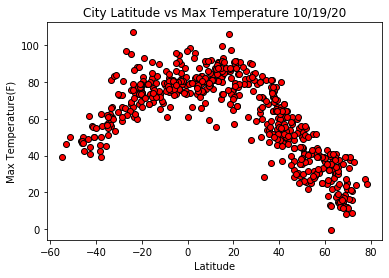

In [19]:
Latitude = Weather_df["Latitude"]
Temp = Weather_df["Temperture"]

plt.scatter(Latitude, Temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.show()

## Latitude vs. Humidity Plot

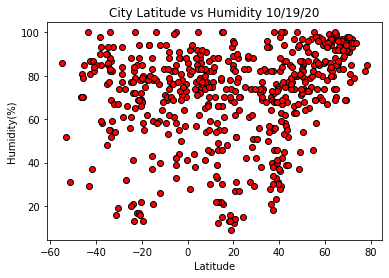

In [21]:
Latitude = Weather_df["Latitude"]
Humidity= Weather_df["Humidity"]

plt.scatter(Latitude, Humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.show()

## Latitude vs. Cloudiness Plot

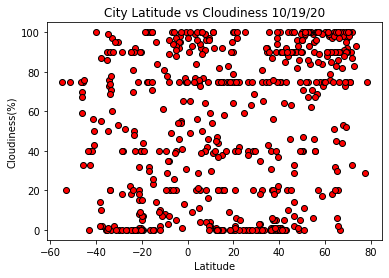

In [23]:
Latitude = Weather_df["Latitude"]
Cloudiness= Weather_df["Clouds"]

plt.scatter(Latitude, Cloudiness, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.show()

## Latitude vs. Wind Speed Plot

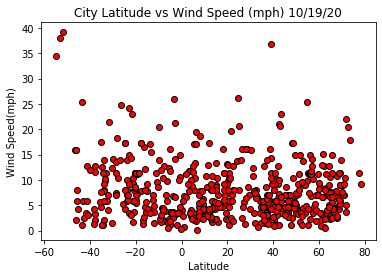

In [24]:
Latitude = Weather_df["Latitude"]
wind_speed= Weather_df["Wind"]

plt.scatter(Latitude, wind_speed, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed (mph) 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperture in the Northern Hempisphere is -0.89


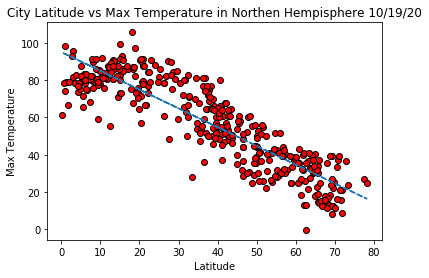

In [58]:
#create northern hemisphre loc statement lat >0 northern df

nh_latitude = Weather_df[(Weather_df.Latitude >=0)]

North_lat = nh_latitude.iloc[:,6]
North_temp = nh_latitude.iloc[:,5]
correlation = st.pearsonr(North_lat,North_temp)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(North_lat, North_temp)
l_fit = l_slope * North_lat + l_int

plt.scatter(North_lat, North_temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature in Northen Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.plot(North_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Max temperture in the Northern Hempisphere is {round(correlation[0],2)}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient between Latitude and Max temperture in the Southern Hempisphere is 0.76


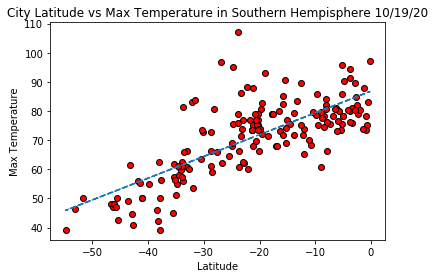

In [61]:
#create southern hemisphre loc statement lat <0 southern df

sh_latitude = Weather_df[(Weather_df.Latitude <=0)]

sh_latitude

south_lat = sh_latitude.iloc[:,6]
south_temp = sh_latitude.iloc[:,5]
correlation = st.pearsonr(south_lat,south_temp)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(south_lat, south_temp)
l_fit = l_slope * south_lat + l_int

plt.scatter(south_lat, south_temp, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Max Temperature in Southern Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.plot(south_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Max temperture in the Southern Hempisphere is {round(correlation[0],2)}")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and humidity % in the Northern Hempisphere is 0.37


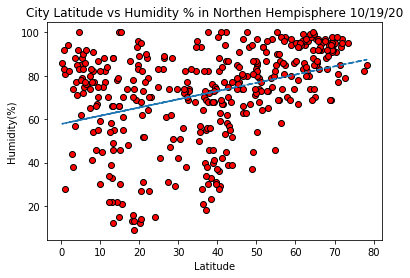

In [62]:
nh_latitude = Weather_df[(Weather_df.Latitude >=0)]

North_lat = nh_latitude.iloc[:,6]
North_humidity = nh_latitude.iloc[:,2]
correlation = st.pearsonr(North_lat,North_humidity)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(North_lat, North_humidity)
l_fit = l_slope * North_lat + l_int

plt.scatter(North_lat, North_humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity % in Northen Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(North_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and humidity % in the Northern Hempisphere is {round(correlation[0],2)}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and humidity % in the Southern Hempisphere is -0.05


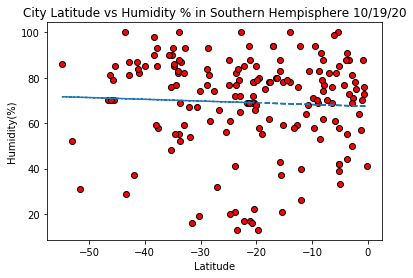

In [68]:
sh_latitude = Weather_df[(Weather_df.Latitude <=0)]

south_lat = sh_latitude.iloc[:,6]
south_humidity = sh_latitude.iloc[:,2]
correlation = st.pearsonr(south_lat,south_humidity)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(south_lat, south_humidity)
l_fit = l_slope * south_lat + l_int

plt.scatter(south_lat, south_humidity, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Humidity % in Southern Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.plot(south_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and humidity % in the Southern Hempisphere is {round(correlation[0],2)}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Cloudiness in the Northern Hempisphere is 0.26


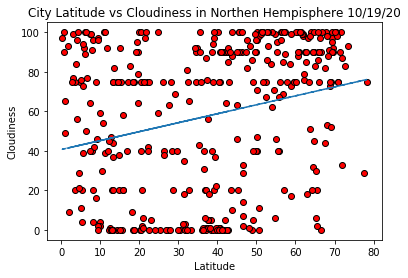

In [69]:
nh_latitude = Weather_df[(Weather_df.Latitude >=0)]

North_lat = nh_latitude.iloc[:,6]
North_cloud = nh_latitude.iloc[:,1]
correlation = st.pearsonr(North_lat,North_cloud)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(North_lat, North_cloud)
l_fit = l_slope * North_lat + l_int

plt.scatter(North_lat, North_cloud, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness in Northen Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(North_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Cloudiness in the Northern Hempisphere is {round(correlation[0],2)}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Cloudiness in the Southern Hempisphere is 0.07


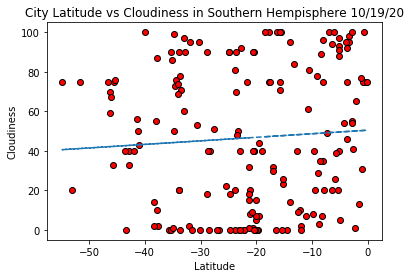

In [71]:
sh_latitude = Weather_df[(Weather_df.Latitude <=0)]

south_lat = sh_latitude.iloc[:,6]
south_cloud = sh_latitude.iloc[:,1]
correlation = st.pearsonr(south_lat,south_cloud)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(south_lat, south_cloud)
l_fit = l_slope * south_lat + l_int

plt.scatter(south_lat, south_cloud, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Cloudiness in Southern Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(south_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Cloudiness in the Southern Hempisphere is {round(correlation[0],2)}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Wind Speed (mph) in the Northern Hempisphere is 0.04


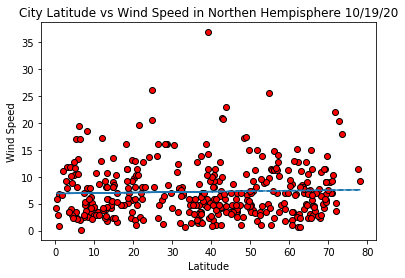

In [72]:
nh_latitude = Weather_df[(Weather_df.Latitude >=0)]

North_lat = nh_latitude.iloc[:,6]
North_ws = nh_latitude.iloc[:,0]
correlation = st.pearsonr(North_lat,North_ws)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(North_lat, North_ws)
l_fit = l_slope * North_lat + l_int

plt.scatter(North_lat, North_ws, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed in Northen Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(North_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Wind Speed (mph) in the Northern Hempisphere is {round(correlation[0],2)}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient between Latitude and Wind Speed (mph) in the Southern Hempisphere is -0.26


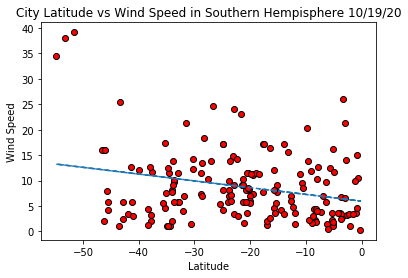

In [73]:
sh_latitude = Weather_df[(Weather_df.Latitude <=0)]

south_lat = sh_latitude.iloc[:,6]
south_ws = sh_latitude.iloc[:,0]
correlation = st.pearsonr(south_lat,south_ws)
l_slope, l_int, l_r, l_p, l_std_err = stats.linregress(south_lat, south_ws)
l_fit = l_slope * south_lat + l_int

plt.scatter(south_lat, south_ws, marker="o", facecolors="red", edgecolors="black")
plt.title("City Latitude vs Wind Speed in Southern Hempisphere 10/19/20")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(south_lat,l_fit,"--")

print(f"The correlation coefficient between Latitude and Wind Speed (mph) in the Southern Hempisphere is {round(correlation[0],2)}")